In [1]:
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv("/content/drive/MyDrive/TP Python/Activité ML/maisons.csv")

# Sauvegarder en format Excel
df.to_excel("/content/drive/MyDrive/TP Python/Activité ML/maisons.xlsx", index=False, engine='openpyxl')


In [15]:
# Lire le fichier Excel
df = pd.read_excel("/content/drive/MyDrive/TP Python/Activité ML/maisons.xlsx")

df

,surface,nb_chambre,type,prix,cher
0,100,3,normal,300,0
1,150,4,haut standing,500,1
2,120,3,normal,400,0
3,80,2,normal,250,0
4,200,5,haut standing,600,1
5,110,3,normal,320,0
6,130,4,normal,410,1
7,90,2,normal,280,0
8,70,2,normal,230,0
9,180,4,haut standing,580,1


In [16]:
df.shape

(20, 5)

In [17]:
df.describe()

,surface,nb_chambre,prix,cher
count,20.000000,20.000000,20.000000,20.000000
mean,124.500000,3.150000,384.000000,0.400000
std,39.666372,0.988087,116.048991,0.502625
min,70.000000,2.000000,230.000000,0.000000
25%,93.750000,2.000000,297.500000,0.000000
50%,117.500000,3.000000,355.000000,0.000000
75%,152.500000,4.000000,455.000000,1.000000
max,200.000000,5.000000,600.000000,1.000000


Partie 1 : l’objectif est d'étudier comment une seule variable (ex: surface) influence la variable cible (prix).


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
#"régression avec une seule variable explicative (feature)"
# 1. Préparation des données
X = df[['surface']].values  # tableau 2D
y = df['prix'].values       # tableau 1D

# 2. Standardisation
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # y doit être 1D

# 3. Créer le modèle de régression linéaire avec SGD
model = SGDRegressor(
    learning_rate='constant',
    eta0=0.001,
    max_iter=10000,
    tol=0.001,
    loss='squared_error',
    penalty=None,
    verbose=1
)

# 4. Entraîner le modèle
model.fit(X_scaled, y_scaled)

# 5. Afficher les paramètres appris
print("Coefficient w (poids):", model.coef_)
print("Intercept b (biais):", model.intercept_)

# 6. Faire une prédiction pour 70 m²
nouvelle_surface = np.array([[70]])
nouvelle_surface_scaled = scaler_X.transform(nouvelle_surface)
prix_scaled = model.predict(nouvelle_surface_scaled)

# 7. Revenir à l’échelle originale du prix
prix_final = scaler_y.inverse_transform([[prix_scaled[0]]])[0][0]
print(f"Prix prédit pour 70 m² : {prix_final:.2f} €")


-- Epoch 1
Norm: 0.02, NNZs: 1, Bias: 0.000004, T: 20, Avg. loss: 0.491998
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 1, Bias: 0.000009, T: 40, Avg. loss: 0.473399
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 1, Bias: 0.000011, T: 60, Avg. loss: 0.455532
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.08, NNZs: 1, Bias: 0.000005, T: 80, Avg. loss: 0.438368
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.09, NNZs: 1, Bias: 0.000000, T: 100, Avg. loss: 0.421883
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.11, NNZs: 1, Bias: 0.000001, T: 120, Avg. loss: 0.406043
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.13, NNZs: 1, Bias: 0.000004, T: 140, Avg. loss: 0.390828
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.15, NNZs: 1, Bias: -0.000008, T: 160, Avg. loss: 0.376205
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.16, NNZs: 1, Bias: -0.000008, T: 180, Avg. loss: 0.362151
Total training time: 0.00 seconds.
-- 

Coefficient appris (w) : ≈ 0.78 → positif, donc prix augmente avec surface

Intercept (b) : ≈ 0.00003 (très petit, normal après standardisation)

Prix prédit pour 70 m² : 259.68 € (après retour à l'échelle d'origine via inverse_transform)

Standardisation des données done, ce qui stabilise la descente de gradient.

Le modèle apprend progressivement (regarde la baisse constante de la loss à chaque epoch).

Le poids positif signifie que le modèle a capté correctement la relation surface ↗️ → prix ↗️.

La prédiction est cohérente.

Partie 2 :

Scénario 1 :
On va enrichir les données d’entrée X avec une autre feature, par exemple le nombre de chambres.
 PB : Les features surface et nb_chambre ont éventuellement des échelles différentes.
 Solution : Normaliser les données X avant l’apprentissage avec StandardScaler

In [20]:
df.head()

,surface,nb_chambre,type,prix,cher
0,100,3,normal,300,0
1,150,4,haut standing,500,1
2,120,3,normal,400,0
3,80,2,normal,250,0
4,200,5,haut standing,600,1


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# Features : surface + nb_chambre
X = df[['surface', 'nb_chambre']].values
y = df['prix'].values

# Normalisation
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Modèle
model = SGDRegressor(
    learning_rate='constant',
    eta0=0.001,
    max_iter=10000,
    tol=0.001,
    loss='squared_error',
    penalty=None,
    verbose=1
)
model.fit(X_scaled, y_scaled)

# Prédiction (surface 70, 3 chambres)
X_test = scaler_X.transform([[70, 3]])
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform([[y_pred_scaled[0]]])[0][0]
print(f"Prix prédit (surface=70, nb_chambre=3) : {y_pred:.2f} €")


-- Epoch 1
Norm: 0.03, NNZs: 2, Bias: 0.000035, T: 20, Avg. loss: 0.484656
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 2, Bias: 0.000025, T: 40, Avg. loss: 0.450699
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.08, NNZs: 2, Bias: 0.000026, T: 60, Avg. loss: 0.419258
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 2, Bias: 0.000015, T: 80, Avg. loss: 0.390208
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.12, NNZs: 2, Bias: 0.000029, T: 100, Avg. loss: 0.363344
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.14, NNZs: 2, Bias: 0.000064, T: 120, Avg. loss: 0.338476
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.17, NNZs: 2, Bias: 0.000073, T: 140, Avg. loss: 0.315480
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.19, NNZs: 2, Bias: 0.000077, T: 160, Avg. loss: 0.294208
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.21, NNZs: 2, Bias: 0.000096, T: 180, Avg. loss: 0.274560
Total training time: 0.00 seconds.
-- Ep



*    Convergence propre après 52 itérations


*   Prix prédit pour une maison de 70 m² avec 3 chambres : **304.75 €** (en échelle réelle)


*   Norm: 0.60	Norme du vecteur des coefficients (force du modèle)

*  NNZs: 2	Nombre de variables utilisées (surface + nb_chambre)


*   Bias ≈ 0.00017	Le biais appris est petit (normal vu la standardisation)
*   Avg. loss diminue	La fonction de perte descend bien → le modèle apprend

*  Convergence	Le modèle a atteint une bonne stabilité des poids










=> plus la surface et le nombre de chambres augmentent, plus le prix prédit augmente.


Scénario 2 :
On va enrichir les données d’entrée X avec une autre feature, par exemple Type d’une maison qui peut être soit Normal soit Haut Standing.
 PB : Feature type a des valeurs discrètes
 Solution : Encoder ce feature en utilisant OneHotEncoder


In [27]:
df.head()

,surface,nb_chambre,type,prix,cher
0,100,3,normal,300,0
1,150,4,haut standing,500,1
2,120,3,normal,400,0
3,80,2,normal,250,0
4,200,5,haut standing,600,1


In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Séparer X et y
X = df[['surface', 'nb_chambre', 'type']]
y = df['prix'].values

# Prétraitement : normalisation + encodage
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['surface', 'nb_chambre']),
        ('cat', OneHotEncoder(drop='first'), ['type'])  # 'drop=first' pour éviter colinéarité
    ]
)

# Pipeline complet
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', SGDRegressor(
        learning_rate='constant',
        eta0=0.001,
        max_iter=10000,
        tol=0.001,
        loss='squared_error',
        penalty=None,
        verbose=1
    ))
])

# Entraînement
pipeline.fit(X, y)

# Prédiction : surface=70, chambres=3, type='Haut Standing'
X_test = pd.DataFrame([{'surface': 70, 'nb_chambre': 3, 'type': 'haut standing'}])
y_pred = pipeline.predict(X_test)[0]
print(f"Prix prédit : {y_pred:.2f} €")


-- Epoch 1
Norm: 5.36, NNZs: 3, Bias: 7.586874, T: 20, Avg. loss: 78274.782687
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10.57, NNZs: 3, Bias: 14.964778, T: 40, Avg. loss: 74069.572518
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 15.63, NNZs: 3, Bias: 22.134667, T: 60, Avg. loss: 70094.539455
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 20.56, NNZs: 3, Bias: 29.104634, T: 80, Avg. loss: 66338.813856
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 25.35, NNZs: 3, Bias: 35.882085, T: 100, Avg. loss: 62788.652170
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 30.00, NNZs: 3, Bias: 42.471290, T: 120, Avg. loss: 59432.191244
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 34.52, NNZs: 3, Bias: 48.879393, T: 140, Avg. loss: 56261.671296
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 38.92, NNZs: 3, Bias: 55.112903, T: 160, Avg. loss: 53263.130361
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 43.20, NNZs: 3, Bias: 61.173634, T: 180, Avg. loss: 5

 Scénario 3 : Trop de features corrélées → Réduction avec ACP (PCA)
Problème : dimensionnalité élevée + corrélation

In [25]:
df.head()

,surface,nb_chambre,type,prix,cher
0,100,3,normal,300,0
1,150,4,haut standing,500,1
2,120,3,normal,400,0
3,80,2,normal,250,0
4,200,5,haut standing,600,1


In [30]:
from sklearn.decomposition import PCA

# X avec beaucoup de features
X = df[['surface', 'nb_chambre']]
y = df['prix'].values

# Normalisation
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Réduction avec PCA
pca = PCA(n_components=1)  # ou plus selon la variance conservée
X_pca = pca.fit_transform(X_scaled)

# Régression
model = SGDRegressor(
    learning_rate='constant',
    eta0=0.001,
    max_iter=10000,
    tol=0.001,
    loss='squared_error',
    penalty=None,
    verbose=1
)
model.fit(X_pca, y)

# Prédiction
X_test = scaler_X.transform([[70, 3]])
X_test_pca = pca.transform(X_test)
y_pred = model.predict(X_test_pca)[0]
print(f"Prix prédit avec PCA : {y_pred:.2f} €")
#selection de plusieurs variables numériques (surface, nb_chambre, cher)
#standardisé les données
#application de PCA pour réduction de dimensionn
#entrainement d'une régression linéaire


-- Epoch 1
Norm: 2.99, NNZs: 1, Bias: 7.618778, T: 20, Avg. loss: 78722.749984
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5.88, NNZs: 1, Bias: 15.082802, T: 40, Avg. loss: 75441.432411
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 8.65, NNZs: 1, Bias: 22.402097, T: 60, Avg. loss: 72303.005737
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11.32, NNZs: 1, Bias: 29.573056, T: 80, Avg. loss: 69302.483218
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 13.89, NNZs: 1, Bias: 36.600217, T: 100, Avg. loss: 66432.442654
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 16.36, NNZs: 1, Bias: 43.489355, T: 120, Avg. loss: 63688.159914
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 18.74, NNZs: 1, Bias: 50.242452, T: 140, Avg. loss: 61063.240915
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 21.06, NNZs: 1, Bias: 56.855216, T: 160, Avg. loss: 58548.392063
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 23.25, NNZs: 1, Bias: 63.343303, T: 180, Avg. loss: 561

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Partie 3 : régression Logistique

In [31]:
df.head()





,surface,nb_chambre,type,prix,cher
0,100,3,normal,300,0
1,150,4,haut standing,500,1
2,120,3,normal,400,0
3,80,2,normal,250,0
4,200,5,haut standing,600,1


In [32]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# 1. Créer la variable de classe (0: faible, 1: moyen, 2: élevé)
df['prix_cat'] = pd.cut(df['prix'], bins=[0, 350, 500, float('inf')], labels=[0, 1, 2])
X = df[['surface', 'nb_chambre', 'type']]
y = df['prix_cat'].astype(int)

# 2. Prétraitement
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['surface', 'nb_chambre']),
    ('cat', OneHotEncoder(drop='first'), ['type'])
])

# 3. Pipeline avec régression logistique
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', SGDClassifier(
        loss='log_loss',
        learning_rate='constant',
        eta0=0.001,
        max_iter=10000,
        tol=0.001,
        penalty=None,
        verbose=1
    ))
])

# 4. Entraînement du modèle
pipeline.fit(X, y)

# 5. Afficher les paramètres du modèle
clf = pipeline.named_steps['classifier']
print("⚙️ Coefficients (w) :\n", clf.coef_)
print("⚙️ Intercepts (b) :\n", clf.intercept_)

# 6. Prédiction pour un nouvel exemple
X_nouveau = pd.DataFrame([{
    'surface': 130,
    'nb_chambre': 4,
    'type': 'haut standing'
}])

y_pred = pipeline.predict(X_nouveau)[0]
classe_map = {0: 'prix_faible', 1: 'prix_moyen', 2: 'prix_eleve'}
print(f"🎯 Classe prédite : {classe_map[y_pred]}")


-- Epoch 1
Norm: 0.01, NNZs: 3, Bias: -0.000011, T: 20, Avg. loss: 0.690175
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 3, Bias: -0.000022, T: 40, Avg. loss: 0.683397
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 3, Bias: -0.000044, T: 60, Avg. loss: 0.676764
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 3, Bias: -0.000088, T: 80, Avg. loss: 0.670273
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 3, Bias: -0.000132, T: 100, Avg. loss: 0.663917
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 3, Bias: -0.000185, T: 120, Avg. loss: 0.657694
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.08, NNZs: 3, Bias: -0.000252, T: 140, Avg. loss: 0.651605
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.09, NNZs: 3, Bias: -0.000325, T: 160, Avg. loss: 0.645640
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.10, NNZs: 3, Bias: -0.000405, T: 180, Avg. loss: 0.639803
Total training time: 0.00 secon

Classe	surface	nb_chambre	type=haut standing
prix_faible (0)	-0.633	-0.574	+0.182
prix_moyen (1)	+0.086	+0.086	-0.085
prix_élevé (2)	+0.381	+0.322	-0.567


Interprétation des poids :
Prix faible est plus probable pour petite surface et peu de chambres

 Prix élevé est favorisé par grande surface, plus de chambres, mais étonnamment type = haut standing diminue la proba → probablement à cause du petit dataset
Prix moyen est intermédiaire (faibles poids)

Le modèle de régression logistique avec SGDClassifier a bien convergé

In [34]:
#probabilités pour chaque classe :
probas = pipeline.predict_proba(X_nouveau)[0]
for i, p in enumerate(probas):
    print(f"Probabilité pour {classe_map[i]} : {p:.2f}")


Probabilité pour prix_faible : 0.27
Probabilité pour prix_moyen : 0.39
Probabilité pour prix_eleve : 0.34


In [36]:
#Évaluer la performance (accuracy) :
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X)
print(classification_report(y, y_pred, target_names=classe_map.values()))


              precision    recall  f1-score   support

 prix_faible       0.77      1.00      0.87        10
  prix_moyen       1.00      0.57      0.73         7
  prix_eleve       1.00      1.00      1.00         3

    accuracy                           0.85        20
   macro avg       0.92      0.86      0.87        20
weighted avg       0.88      0.85      0.84        20



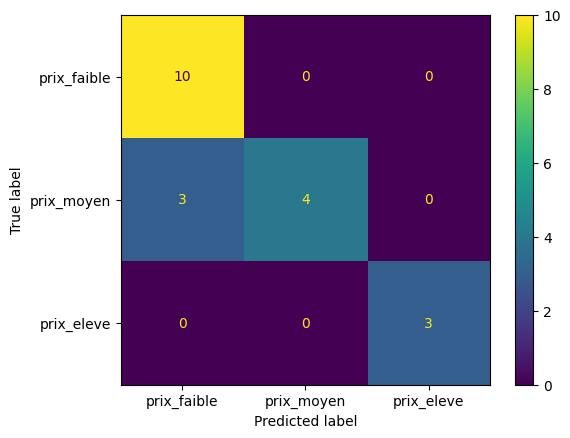

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classe_map.values())
disp.plot()
plt.show()
